# **Importing Libraries**

In [69]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objs as go

In [70]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

# Getting Datasets

In [71]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [72]:
df_matches=pd.read_csv("/content/gdrive/MyDrive/matches.csv")
df_matches.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [73]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [74]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [75]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [76]:
df_balls=pd.read_csv("/content/gdrive/MyDrive/deliveries.csv")
df_balls.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [77]:
df_balls.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [78]:
df_balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [79]:
df_balls.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [80]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [81]:
df_balls.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [82]:
for col in df_matches:
    print(df_matches[col].unique())

[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163   164   

# Correction for Duplicaate teams name and city

In [83]:
df_matches.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
df_balls.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
df_matches.replace({'M. Chinnaswamy Stadium' : 'M Chinnaswamy Stadium'},regex=True,inplace=True)
df_balls.replace({'M. Chinnaswamy Stadium' : 'M Chinnaswamy Stadium'},regex=True,inplace=True)
df_matches.replace({'M. A. Chidambaram Stadium' : 'MA Chidambaram Stadium, Chepauk'},regex=True,inplace=True)
df_balls.replace({'M. A. Chidambaram Stadium' : 'MA Chidambaram Stadium, Chepauk'},regex=True,inplace=True)
df_matches.replace({'Deccan Chargers' : 'Sunrisers Hyderabad'},regex=True,inplace=True)
df_matches.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)


In [84]:
df_matches.replace({'Bangalore':'Bengaluru'},regex=True,inplace=True)
df_balls.replace({'Bangalore':'Bengaluru'},regex=True,inplace=True)

# Dropping Insignificant Columns

In [85]:
df_matches=df_matches.drop(columns=['umpire3'],axis=1)

# Dropping Insignificant Rows

In [86]:
df_matches=df_matches[df_matches['winner'].isna()==False]
#since winner names are not available

# Replacing Null value of Cities by Imputation

In [87]:
##Filling the values of city based on venue
conditions = [df_matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",df_matches["venue"] == "Maharashtra Cricket Association Stadium",
              df_matches["venue"] == "Saurashtra Cricket Association Stadium", df_matches["venue"] == "Holkar Cricket Stadium",
              df_matches["venue"] == "M Chinnaswamy Stadium",df_matches["venue"] == "Wankhede Stadium",
              df_matches["venue"] == "Eden Gardens",df_matches["venue"] == "Feroz Shah Kotla",
              df_matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",df_matches["venue"] == "Green Park",
              df_matches["venue"] == "Punjab Cricket Association Stadium, Mohali",df_matches["venue"] == "Dr DY Patil Sports Academy",
              df_matches["venue"] == "Sawai Mansingh Stadium", df_matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              df_matches["venue"] == "Newlands", df_matches["venue"] == "St George's Park" , 
              df_matches["venue"] == "Kingsmead", df_matches["venue"] == "SuperSport Park",
              df_matches["venue"] == "Buffalo Park", df_matches["venue"] == "New Wanderers Stadium",
              df_matches["venue"] == "De Beers Diamond Oval", df_matches["venue"] == "OUTsurance Oval", 
              df_matches["venue"] == "Brabourne Stadium",df_matches["venue"] == "Sardar Patel Stadium", 
              df_matches["venue"] == "Barabati Stadium", df_matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              df_matches["venue"] == "Himachal Pradesh Cricket Association Stadium",df_matches["venue"] == "Nehru Stadium",
              df_matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",df_matches["venue"] == "Subrata Roy Sahara Stadium",
              df_matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",df_matches["venue"] == "JSCA International Stadium Complex",
              df_matches["venue"] == "Sheikh Zayed Stadium",df_matches["venue"] == "Sharjah Cricket Stadium",
              df_matches["venue"] == "Dubai International Cricket Stadium",df_matches["venue"] == "M. A. Chidambaram Stadium",
              df_matches["venue"] == "Feroz Shah Kotla Ground",df_matches["venue"] == "M. Chinnaswamy Stadium",
              df_matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,df_matches["venue"] == "IS Bindra Stadium",df_matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
df_matches['city'] = np.where(df_matches['city'].isnull(),
                              np.select(conditions, values),
                              df_matches['city'])

# EDA

## Which stadium hosted the most number of IPL matches?

In [105]:
counts_venue=df_matches['venue'].value_counts()
counts_venue

Eden Gardens                                            77
M Chinnaswamy Stadium                                   77
Wankhede Stadium                                        73
Feroz Shah Kotla                                        66
MA Chidambaram Stadium, Chepauk                         57
Rajiv Gandhi International Stadium, Uppal               56
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [106]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



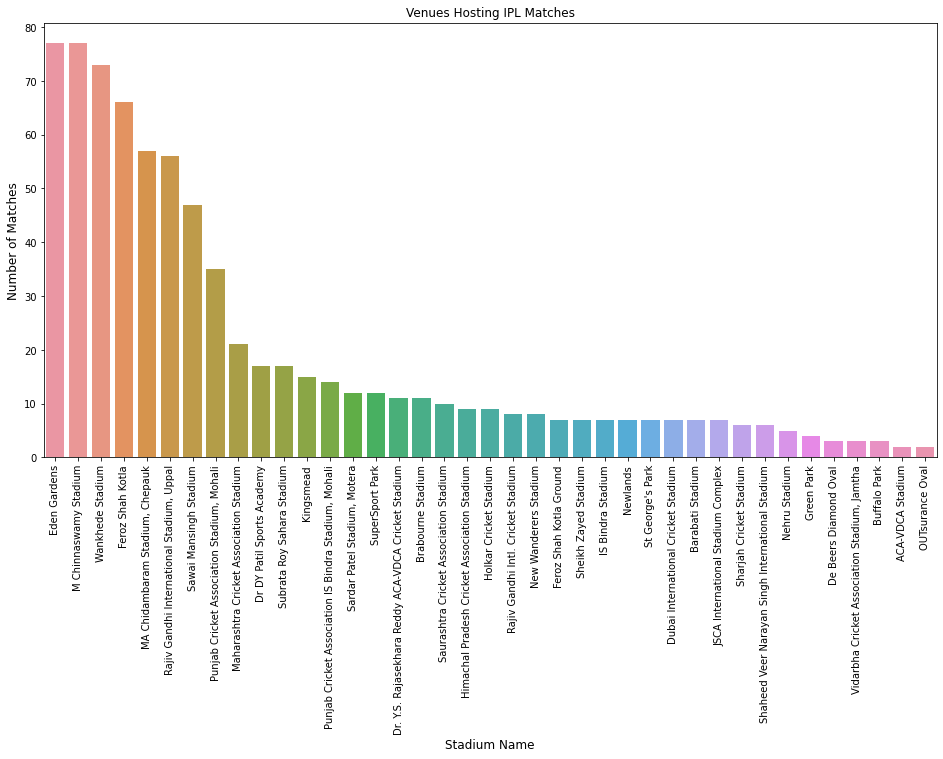

In [107]:
plt.figure(figsize=(16,8))
sns.barplot(counts_venue.index,counts_venue.values)
plt.title('Venues Hosting IPL Matches')
plt.ylabel('Number of Matches', fontsize=12)
plt.xlabel('Stadium Name', fontsize=12)
plt.xticks(rotation=90)
plt.show()

 M Chinnaswamy Stadium and Eden Gardens have hosted the maximum number of IPL matches followed by Wankhede Stadium and Feroz Shah Kotla.

## Which player has won the most number of Man of the Match (MoM) awards?

In [108]:
counts_MoM=df_matches['player_of_match'].value_counts()
counts_MoM

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
                  ..
JDP Oram           1
LJ Wright          1
Kuldeep Yadav      1
RA Tripathi        1
LH Ferguson        1
Name: player_of_match, Length: 226, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



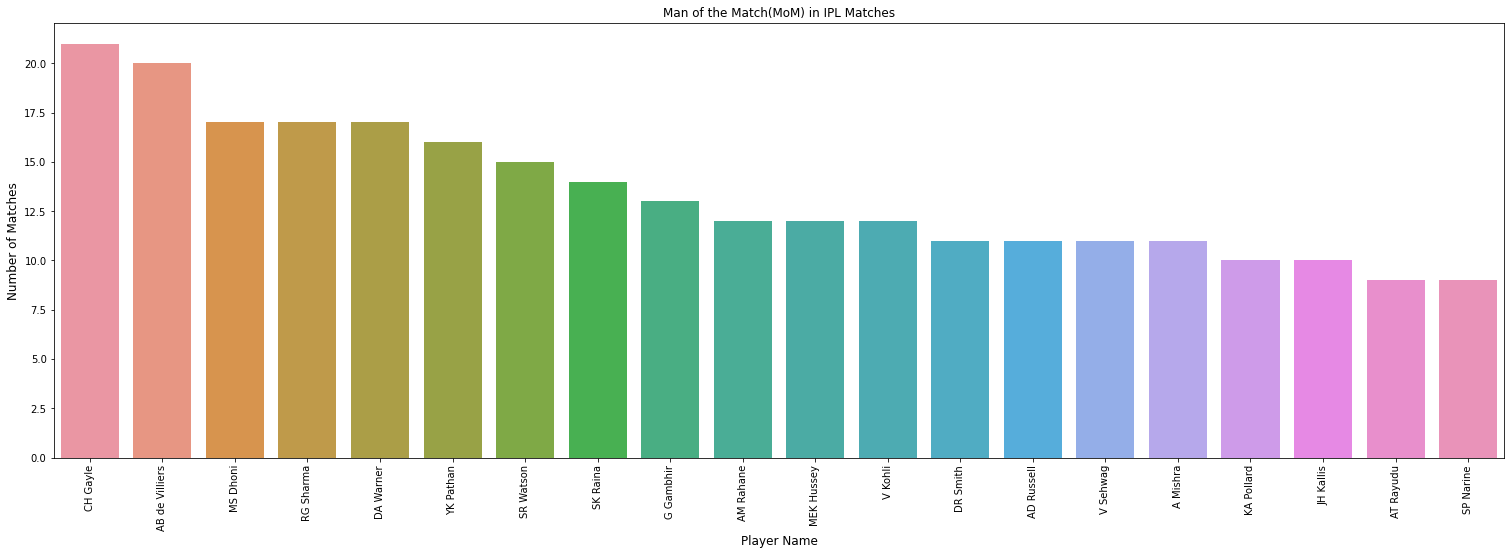

In [109]:
plt.figure(figsize=(26,8))
sns.barplot(counts_MoM.index[0:20],counts_MoM.values[0:20])
plt.title('Man of the Match(MoM) in IPL Matches')
plt.ylabel('Number of Matches', fontsize=12)
plt.xlabel('Player Name', fontsize=12)
plt.xticks(rotation=90)
plt.show()

*CH Gayle has won the most number of Man of the Match (MoM) awards followed by AB de Villers and MS Dhoni*

## Which team has won the most number/percentage of matches?

In [110]:
counts_winner=df_matches['winner'].value_counts()
counts_winner

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bengaluru     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



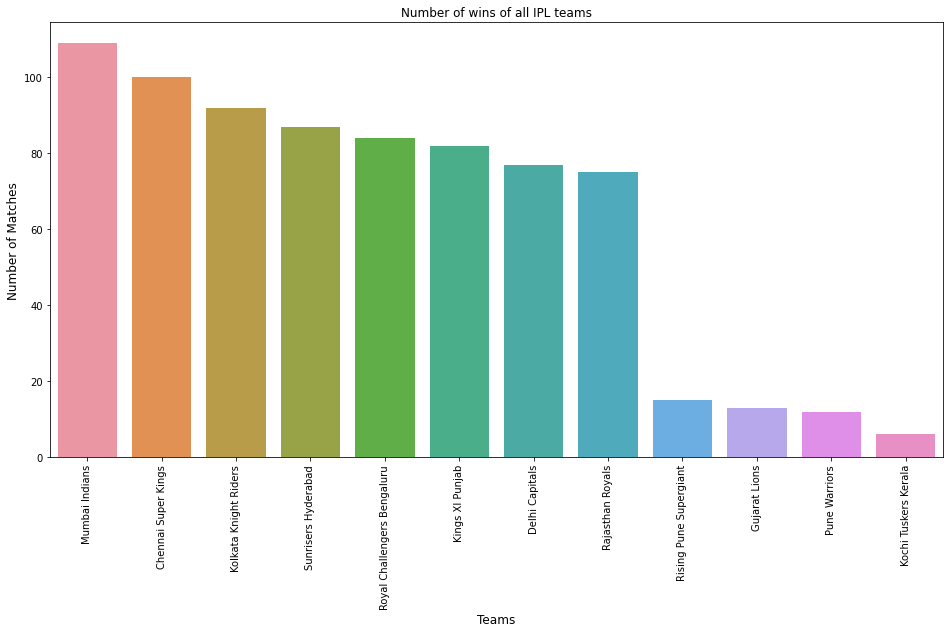

In [111]:
plt.figure(figsize=(16,8))
sns.barplot(counts_winner.index,counts_winner.values)
plt.title('Number of wins of all IPL teams')
plt.ylabel('Number of Matches', fontsize=12)
plt.xlabel('Teams', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Mumbai Indians has highest number of victories followed by Chennai Super Kings (though they missed two seasons) and Kochi Tuskers Kerala has least number of victories.

In [112]:
counts_winner_temp=df_matches['winner'].value_counts(sort=False)
counts_winner_team1=df_matches['team1'].value_counts(sort=False)
counts_winner_team2=df_matches['team2'].value_counts(sort=False)
percentage_win=counts_winner_temp.values*100/(counts_winner_team1.values+counts_winner_team2.values)
percentage_win

array([46.59090909, 58.28877005, 50.        , 51.72413793, 43.33333333,
       44.        , 51.68539326, 60.97560976, 47.54098361, 26.66666667,
       47.45762712, 42.85714286])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



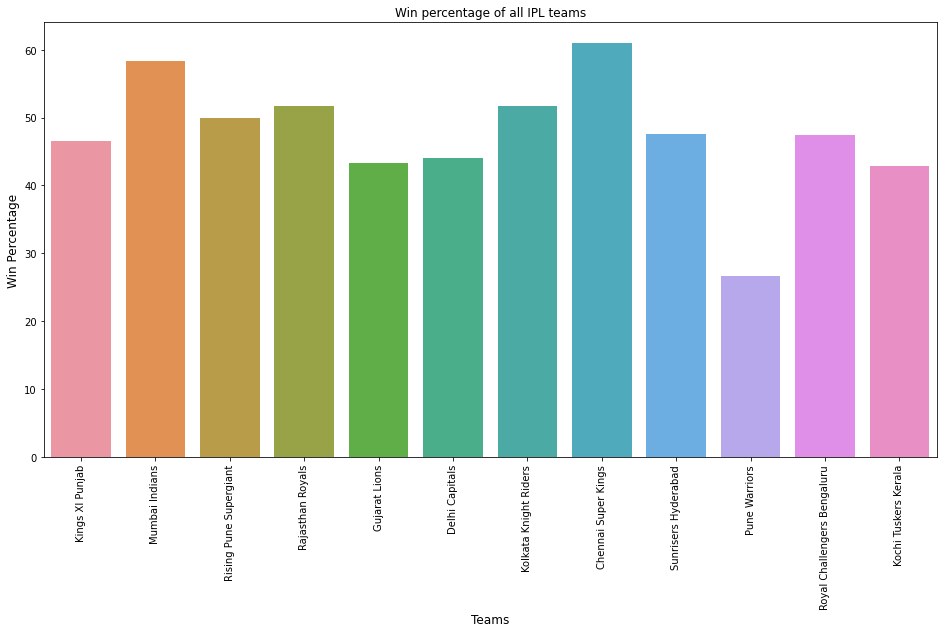

In [113]:
plt.figure(figsize=(16,8))
sns.barplot(counts_winner_temp.index,percentage_win)
plt.title('Win percentage of all IPL teams')
plt.ylabel('Win Percentage', fontsize=12)
plt.xlabel('Teams', fontsize=12)
plt.xticks(rotation=90)
plt.show()

This is a better representation as all teams have played different number of matches.
Chennai Super Kings has the highest winning percentage followed by Mumbai Indians. Pune Warriors has the lowest winning percentage.

## Which team has won the most tosses?

In [114]:
counts_toss_winner=df_matches['toss_winner'].value_counts()
counts_toss_winner

Mumbai Indians                 98
Kolkata Knight Riders          92
Sunrisers Hyderabad            89
Chennai Super Kings            89
Delhi Capitals                 89
Kings XI Punjab                81
Royal Challengers Bengaluru    80
Rajasthan Royals               78
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiant         13
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



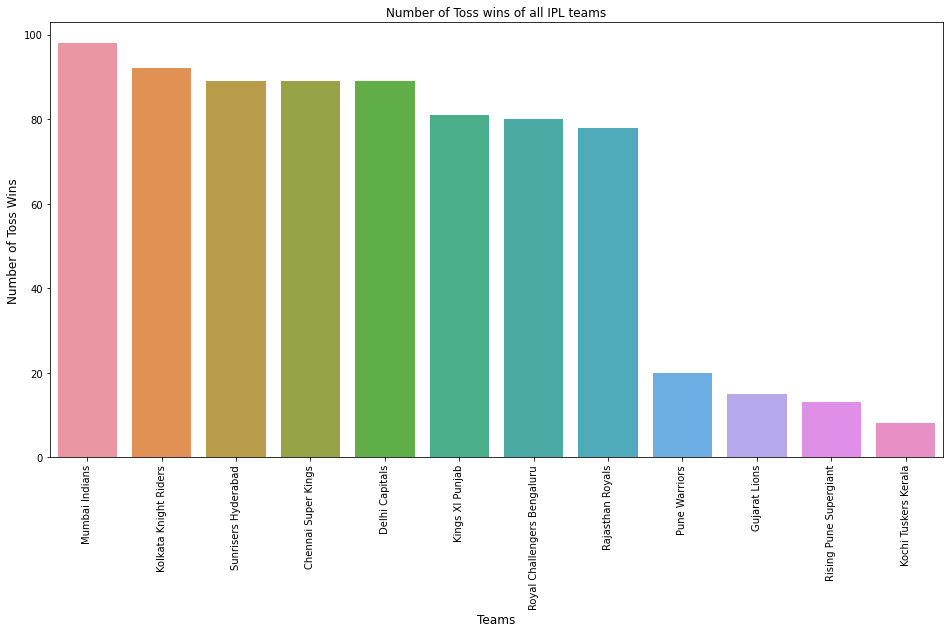

In [115]:
plt.figure(figsize=(16,8))
sns.barplot(counts_toss_winner.index,counts_toss_winner.values)
plt.title('Number of Toss wins of all IPL teams')
plt.ylabel('Number of Toss Wins', fontsize=12)
plt.xlabel('Teams', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Mumbai Indians has won most number of tossses followed by Kolkata Knight Riders.

In [116]:
counts_toss_winner_temp=df_matches['toss_winner'].value_counts(sort=False)
percentage_toss_win=counts_toss_winner_temp.values*100/(counts_winner_team1.values+counts_winner_team2.values)
percentage_toss_win

array([46.02272727, 52.40641711, 43.33333333, 53.79310345, 50.        ,
       50.85714286, 51.68539326, 54.26829268, 48.63387978, 44.44444444,
       45.19774011, 57.14285714])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



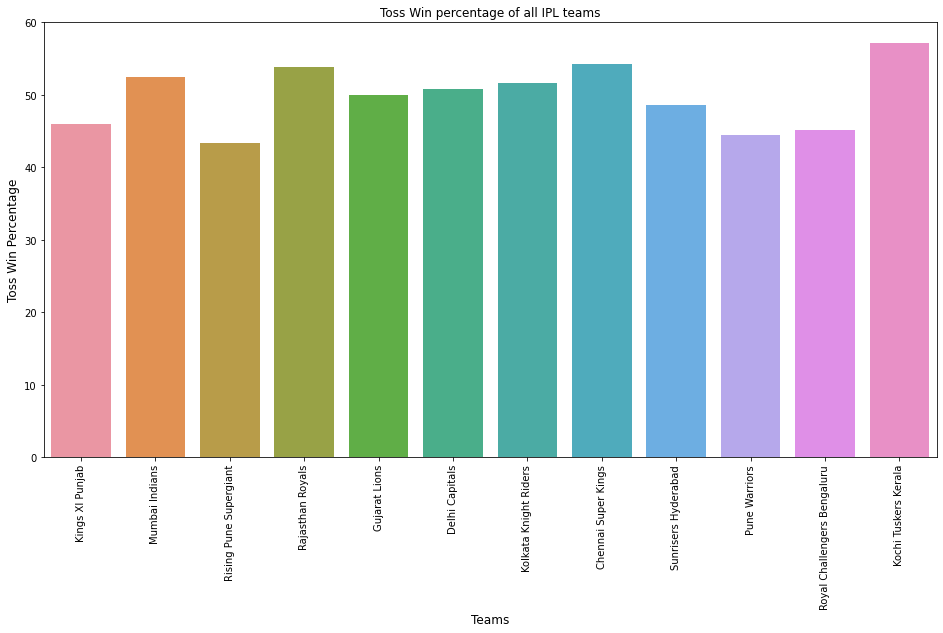

In [117]:
plt.figure(figsize=(16,8))
sns.barplot(counts_toss_winner_temp.index,percentage_toss_win)
plt.title('Toss Win percentage of all IPL teams')
plt.ylabel('Toss Win Percentage', fontsize=12)
plt.xlabel('Teams', fontsize=12)
plt.xticks(rotation=90)
plt.show()

This is a better representation as all teams have played different number of matches. Kolkata Knight Riders has the highest toss winning percentage followed by Gujrat Lions. Pune Warriors has the lowest toss winning percentage.



## What is the maximum number of wins by any team in particular seasons?

In [118]:
teams= df_matches.groupby('season')
#teams.head()
teams_win_every_season=teams['winner'].value_counts()
teams_win_every_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Capitals                  7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bengaluru     5
Name: winner, Length: 100, dtype: int64

In [119]:
year = 2008
df_most_win_every_season = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_win_every_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        df_most_win_every_season = df_most_win_every_season.append(win_series)
        year =year+ 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Capitals'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [120]:
df_most_win_every_season

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Capitals,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


## What are the top 10 greatest victories (by runs and by wickets)?

In [121]:
df_winner_by_runs= df_matches[df_matches['win_by_runs'].isna()==False]
df_winner_by_wickets= df_matches[df_matches['win_by_wickets'].isna()==False]

In [122]:
sorted_df_winner_by_runs=df_winner_by_runs.sort_values(by=['win_by_runs'], ascending=False)
sorted_df_winner_by_runs

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,06-05-2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan
619,620,2016,Bengaluru,14-05-2016,Royal Challengers Bengaluru,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bengaluru,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma
59,60,2008,Bengaluru,18-04-2008,Kolkata Knight Riders,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
556,557,2015,Bengaluru,06-05-2015,Royal Challengers Bengaluru,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bengaluru,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni
410,411,2013,Bengaluru,23-04-2013,Royal Challengers Bengaluru,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bengaluru,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,473,2014,Sharjah,27-04-2014,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Delhi Capitals,0,6,M Vijay,Sharjah Cricket Stadium,Aleem Dar,VA Kulkarni
83,84,2008,Bengaluru,05-05-2008,Royal Challengers Bengaluru,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,S Sreesanth,M Chinnaswamy Stadium,SJ Davis,BR Doctrove
470,471,2014,Abu Dhabi,26-04-2014,Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,PV Tambe,Sheikh Zayed Stadium,HDPK Dharmasena,C Shamshuddin
469,470,2014,Dubai,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus


In [138]:
sorted_df_winner_by_runs.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,06-05-2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan
619,620,2016,Bengaluru,14-05-2016,Royal Challengers Bengaluru,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bengaluru,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma
59,60,2008,Bengaluru,18-04-2008,Kolkata Knight Riders,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
556,557,2015,Bengaluru,06-05-2015,Royal Challengers Bengaluru,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bengaluru,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni
410,411,2013,Bengaluru,23-04-2013,Royal Challengers Bengaluru,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bengaluru,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin
706,11147,2019,Hyderabad,31-03-2019,Sunrisers Hyderabad,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Sunrisers Hyderabad,118,0,J Bairstow,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,KN Anantapadmanabhan
295,296,2011,Dharamsala,17-05-2011,Kings XI Punjab,Royal Challengers Bengaluru,Kings XI Punjab,bat,normal,0,Kings XI Punjab,111,0,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba
114,115,2008,Mumbai,30-05-2008,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen
676,7934,2018,Kolkata,09-05-2018,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,102,0,Ishan Kishan,Eden Gardens,Anil Chaudhary,K Ananthapadmanabhan
182,183,2010,Delhi,17-03-2010,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,98,0,SR Tendulkar,Feroz Shah Kotla,BR Doctrove,SK Tarapore


In [123]:
sorted_df_winner_by_wickets=df_winner_by_wickets.sort_values(by=['win_by_wickets'], ascending=False)
sorted_df_winner_by_wickets

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
390,391,2013,Chandigarh,10-04-2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
183,184,2010,Bengaluru,18-03-2010,Rajasthan Royals,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Royal Challengers Bengaluru,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
376,377,2012,Jaipur,20-05-2012,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
119,120,2009,Cape Town,19-04-2009,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,1,Delhi Capitals,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,2012,Chennai,19-04-2012,Chennai Super Kings,Pune Warriors,Pune Warriors,field,normal,0,Chennai Super Kings,13,0,KMDN Kulasekara,"MA Chidambaram Stadium, Chepauk",Asad Rauf,S Das
325,326,2012,Bengaluru,15-04-2012,Rajasthan Royals,Royal Challengers Bengaluru,Rajasthan Royals,bat,normal,0,Rajasthan Royals,59,0,AM Rahane,M Chinnaswamy Stadium,JD Cloete,RJ Tucker
324,325,2012,Kolkata,15-04-2012,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,2,0,SP Narine,Eden Gardens,Asad Rauf,S Asnani
318,319,2012,Mumbai,11-04-2012,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,27,0,KA Pollard,Wankhede Stadium,Aleem Dar,BNJ Oxenford


Top 10 greatest victories by runs

In [124]:
sorted_df_winner_by_runs.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,06-05-2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan
619,620,2016,Bengaluru,14-05-2016,Royal Challengers Bengaluru,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bengaluru,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma
59,60,2008,Bengaluru,18-04-2008,Kolkata Knight Riders,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
556,557,2015,Bengaluru,06-05-2015,Royal Challengers Bengaluru,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bengaluru,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni
410,411,2013,Bengaluru,23-04-2013,Royal Challengers Bengaluru,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bengaluru,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin
706,11147,2019,Hyderabad,31-03-2019,Sunrisers Hyderabad,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Sunrisers Hyderabad,118,0,J Bairstow,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,KN Anantapadmanabhan
295,296,2011,Dharamsala,17-05-2011,Kings XI Punjab,Royal Challengers Bengaluru,Kings XI Punjab,bat,normal,0,Kings XI Punjab,111,0,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba
114,115,2008,Mumbai,30-05-2008,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen
676,7934,2018,Kolkata,09-05-2018,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,102,0,Ishan Kishan,Eden Gardens,Anil Chaudhary,K Ananthapadmanabhan
182,183,2010,Delhi,17-03-2010,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,98,0,SR Tendulkar,Feroz Shah Kotla,BR Doctrove,SK Tarapore


The biggest win by runs was recorded in 2017. Mumbai Indians won by 146 runs against Delhi Daredevils.

Top 10 greatest victories by wickets

In [125]:
sorted_df_winner_by_wickets.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
390,391,2013,Chandigarh,10-04-2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
183,184,2010,Bengaluru,18-03-2010,Rajasthan Royals,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Royal Challengers Bengaluru,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
376,377,2012,Jaipur,20-05-2012,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
119,120,2009,Cape Town,19-04-2009,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,1,Delhi Capitals,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
683,7941,2018,Indore,14-05-2018,Kings XI Punjab,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Royal Challengers Bengaluru,0,10,UT Yadav,Holkar Cricket Stadium,Bruce Oxenford,Virender Kumar Sharma
34,35,2017,Chandigarh,30-04-2017,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
71,72,2008,Mumbai,27-04-2008,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
542,543,2015,Delhi,26-04-2015,Delhi Capitals,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Royal Challengers Bengaluru,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
298,299,2011,Mumbai,20-05-2011,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel


In all top 10 wins by wickets, winning team has won by 10 tickets.

## Most 50s and 100s scored.

In [126]:
century = df_balls.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
century = century[century['batsman_runs']>=100]
century = century.groupby(['batsman']).agg({'count'})
century
century.columns = century.columns.droplevel()
century = century.sort_values(by='count',ascending=False)
century


,count
batsman,
CH Gayle,7
V Kohli,5
DA Warner,4
SR Watson,4
AB de Villiers,3
HM Amla,2
AC Gilchrist,2
AM Rahane,2
V Sehwag,2


C H Gayle has most number of centuries followed by V Kohli and DA Warner.

In [127]:
half_century = df_balls.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
half_century = half_century[half_century['batsman_runs']>=50]
half_century = half_century[half_century['batsman_runs']<100]
half_century = half_century.groupby(['batsman']).agg({'count'})
half_century.columns = half_century.columns.droplevel()
half_century = half_century.sort_values(by='count',ascending=False)
half_century


,count
batsman,
DA Warner,44
V Kohli,38
SK Raina,38
S Dhawan,37
RG Sharma,36
...,...
S Vidyut,1
SA Yadav,1
DJ Hooda,1


DA Warner has most number of half-centuries followed by V Kohli and SK Raina

Top 20 for century and half century

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



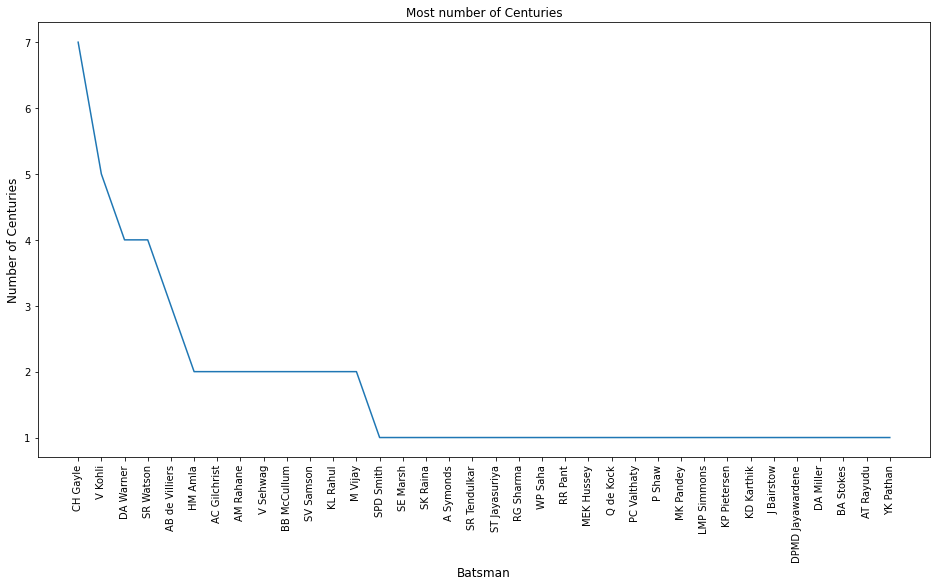

In [128]:
plt.figure(figsize=(16,8))
sns.lineplot(century.index, century['count'])
plt.title('Most number of Centuries')
plt.ylabel('Number of Centuries', fontsize=12)
plt.xlabel('Batsman', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Considering only top 40 batsmen for graphical representation





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



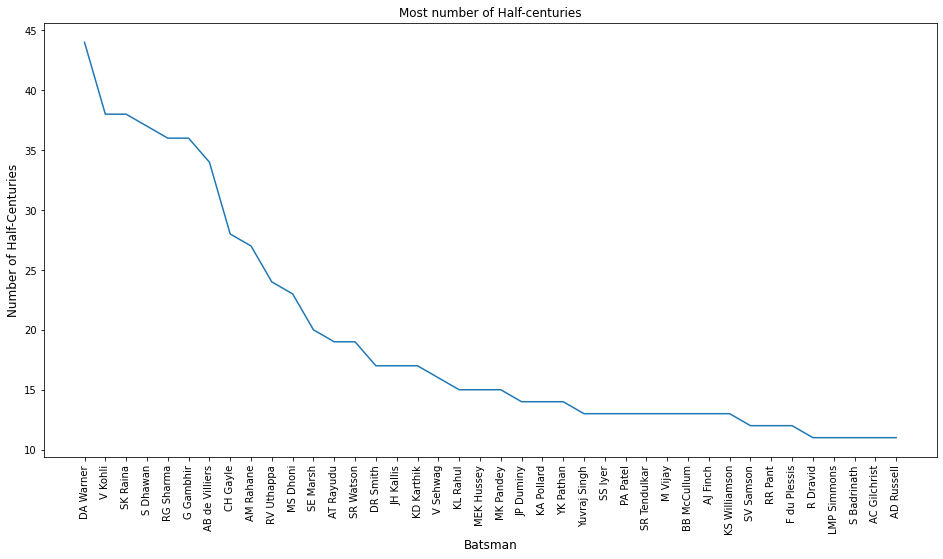

In [129]:
plt.figure(figsize=(16,8))
sns.lineplot(half_century.index[0:40], half_century['count'][0:40])
plt.title('Most number of Half-centuries')
plt.ylabel('Number of Half-Centuries', fontsize=12)
plt.xlabel('Batsman', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# A bi-histogram plot for some Team1 vs Team2 with x axis as different years. This will give us an estimate of how the two teams perform against each other over the years

In [130]:
def team1_vs_team2(team1, team2):
    vs=df_matches[((df_matches['team1']==team1)|(df_matches['team2']==team1))&((df_matches['team1']==team2)|(df_matches['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=vs,palette='Set3')
    plt.xticks(rotation='vertical')
    leg = plt.legend( loc = 'upper center')
    fig=plt.gcf()
    fig.set_size_inches(10,7)
    plt.show()


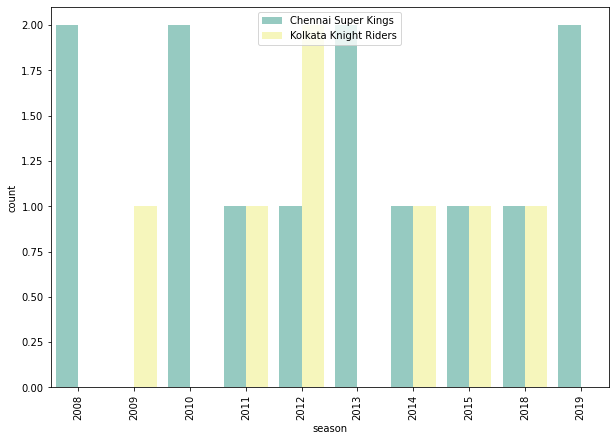

In [131]:
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')

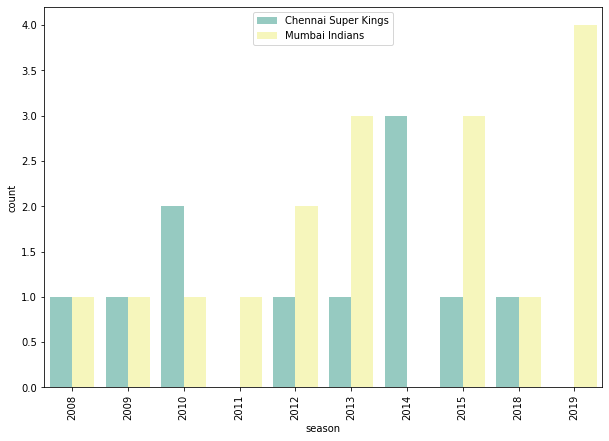

In [132]:
team1_vs_team2('Mumbai Indians','Chennai Super Kings')

## Strike Rate of Batsman in different phases of game

In [133]:
# identify top key
key='batsman'
top_batsmen=df_balls[key].value_counts()[:50].index

In [134]:
df_pt=df_balls.pivot_table(index=['batsman','over'],aggfunc=['count','sum'],values='batsman_runs'
                  )

df_pt=df_pt.fillna(0).reset_index()
df_pt.columns=['batsman','over','balls','runs']
df_pt['strike_rate']=round(df_pt.runs/df_pt.balls*100,1)
df_pt

,batsman,over,balls,runs,strike_rate
0,A Ashish Reddy,5,2,0,0.0
1,A Ashish Reddy,6,5,5,100.0
2,A Ashish Reddy,12,1,1,100.0
3,A Ashish Reddy,13,9,9,100.0
4,A Ashish Reddy,14,15,22,146.7
...,...,...,...,...,...
5716,Z Khan,16,11,7,63.6
5717,Z Khan,17,16,5,31.2
5718,Z Khan,18,18,15,83.3
5719,Z Khan,19,30,41,136.7


In [135]:
import altair as alt

In [136]:
alt.data_transformers.disable_max_rows()

df_pt.columns
alt.Chart(df_pt[df_pt.batsman.isin(top_batsmen)]).mark_point(shape="circle").encode(
alt.X('over'),
alt.Y('mean(strike_rate)'),
color='batsman',
text="batsman",
size='balls',
opacity='runs',
tooltip=list(df_pt.columns)
).properties(width=600,height=500)

alt.Chart(...)

# **PDA**

## **Winner Prediction:Classification**

Data Pre-processing

In [ ]:
df_matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            2
umpire2            2
dtype: int64

Umpires are not important factor in winner prediction, so we can drop those two columns

In [ ]:
df_matches=df_matches.drop(columns=['umpire1','umpire2'],axis=1)

In [ ]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bengaluru,08-04-2017,Royal Challengers Bengaluru,Delhi Capitals,Royal Challengers Bengaluru,bat,normal,0,Royal Challengers Bengaluru,15,0,KM Jadhav,M Chinnaswamy Stadium


As team_1, team_2, toss_winner, toss_decision, venue, city, result and winner are not numeric values, these are converted into numeric values by label encoder

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [ ]:
#encoding the numeric values
df_matches["team1"]=encoder.fit_transform(df_matches["team1"])
df_matches["team2"]=encoder.fit_transform(df_matches["team2"])
df_matches["winner"]=encoder.fit_transform(df_matches["winner"].astype(str))
df_matches["toss_winner"]=encoder.fit_transform(df_matches["toss_winner"])
df_matches["venue"]=encoder.fit_transform(df_matches["venue"])
df_matches["result"]=encoder.fit_transform(df_matches["result"])

Adding columns to get clearer idea of the outcome of match result and toss result

In [ ]:
#outcome variable team1_win for team1 winning the match
df_matches.loc[df_matches["winner"]==df_matches["team1"],"team1_win"]=1
df_matches.loc[df_matches["winner"]!=df_matches["team1"],"team1_win"]=0

#outcome variable team1_toss_win for team1 winning the toss
df_matches.loc[df_matches["toss_winner"]==df_matches["team1"],"team1_toss_win"]=1
df_matches.loc[df_matches["toss_winner"]!=df_matches["team1"],"team1_toss_win"]=0

#outcome variable team1_bat for team1 bats first
df_matches["team1_bat"]=0
df_matches.loc[(df_matches["team1_toss_win"]==1) & (df_matches["toss_decision"]=="bat"),"team1_bat"]=1


In [ ]:
df_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,05-04-2017,11,10,10,field,0,0,11,35,0,Yuvraj Singh,26,1.0,0.0,0
1,2,2017,Pune,06-04-2017,6,9,9,field,0,0,9,0,7,SPD Smith,19,0.0,0.0,0
2,3,2017,Rajkot,07-04-2017,2,5,5,field,0,0,5,0,10,CA Lynn,29,0.0,0.0,0
3,4,2017,Indore,08-04-2017,9,3,3,field,0,0,3,0,6,GJ Maxwell,13,0.0,0.0,0
4,5,2017,Bengaluru,08-04-2017,10,1,10,bat,0,0,10,15,0,KM Jadhav,17,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05-05-2019,5,6,6,field,0,0,6,0,9,HH Pandya,38,0.0,0.0,0
752,11412,2019,Chennai,07-05-2019,0,6,0,bat,0,0,6,0,6,AS Yadav,18,0.0,1.0,1
753,11413,2019,Visakhapatnam,08-05-2019,11,1,1,field,0,0,1,0,2,RR Pant,0,0.0,0.0,0
754,11414,2019,Visakhapatnam,10-05-2019,1,0,0,field,0,0,0,0,6,F du Plessis,0,0.0,0.0,0


## **Features Engineering**

Taking out predictors of winner 

In [ ]:
predictors=df_matches[["team1","team2","team1_toss_win","team1_bat","dl_applied","venue"]]

Correlation analysis for finding similar features

In [ ]:
correlated_features = set()
correlation_matrix = predictors.corr()
correlation_matrix

,team1,team2,team1_toss_win,team1_bat,dl_applied,venue
team1,1.000000,-0.145180,-0.046366,-0.046366,-0.024768,0.131948
team2,-0.145180,1.000000,0.001407,0.001407,-0.009859,0.058249
team1_toss_win,-0.046366,0.001407,1.000000,1.000000,-0.023953,0.043980
team1_bat,-0.046366,0.001407,1.000000,1.000000,-0.023953,0.043980
dl_applied,-0.024768,-0.009859,-0.023953,-0.023953,1.000000,-0.067483
venue,0.131948,0.058249,0.043980,0.043980,-0.067483,1.000000


Here, we see that team1_bat represents the same information as team1_toss_win. So we removed the column team1_bat from our list of features.

In [ ]:
predictors=predictors.drop(columns=["team1_bat"],axis=1)
predictors

,team1,team2,team1_toss_win,dl_applied,venue
0,11,10,0.0,0,26
1,6,9,0.0,0,19
2,2,5,0.0,0,29
3,9,3,0.0,0,13
4,10,1,1.0,0,17
...,...,...,...,...,...
751,5,6,0.0,0,38
752,0,6,1.0,0,18
753,11,1,0.0,0,0
754,1,0,0.0,0,0


## **ML Models**

Spliting the data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(predictors, df_matches['team1_win'], test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(601, 5) (151, 5) (601,) (151,)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred_lr = logreg.predict(x_test)
y_pred_lr

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
#Confusion Matrix Representation
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_lr)
cm

array([[76,  2],
       [70,  3]])

In [ ]:
#Accuracy Measure
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_lr)


0.5231788079470199

## SVM

In [ ]:
from sklearn import svm
svm=svm.SVC()

In [ ]:
svm.fit(x_train,y_train)

SVC()

In [ ]:
svm.score(x_test,y_test)

0.5165562913907285

In [ ]:
y_pred_svm=svm.predict(x_test)
y_pred_svm

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
confusion_matrix(y_test,y_pred_svm)

array([[78,  0],
       [73,  0]])

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = None,oob_score=True)
rf.fit(x_train,y_train)

RandomForestClassifier(oob_score=True)

In [ ]:
y_pred_rf=rf.predict(x_test)

In [ ]:
rf.feature_importances_

array([0.26868673, 0.28132675, 0.06482421, 0.01515223, 0.37001008])

In [ ]:
rf.score(x_test,y_test)

0.5033112582781457

In [ ]:
confusion_matrix(y_test,y_pred_rf)

array([[45, 33],
       [42, 31]])

## **Final Score Prediction:Regression** 



In [ ]:
df_balls.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [ ]:
df_balls.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


dismissal_kind and fielder are not important in predicting final score, so those can be dropped.

In [ ]:
df_balls=df_balls.drop(columns=["dismissal_kind","fielder"],axis=1)

In [ ]:
df_balls["player_dismissed"]=df_balls["player_dismissed"].fillna(0)

In [ ]:
df_balls['inning'] = df_balls['match_id'].astype(str)+(df_balls['batting_team']).astype(str)
df_balls.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed
0,1,1Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bengaluru,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0
1,1,1Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bengaluru,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0
2,1,1Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bengaluru,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0
3,1,1Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bengaluru,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0
4,1,1Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bengaluru,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,0


Making a list of all unique inning names

In [ ]:
list1 = df_balls['inning'].unique()
list1

array(['1Sunrisers Hyderabad', '1Royal Challengers Bengaluru',
       '2Mumbai Indians', ..., '11414Chennai Super Kings',
       '11415Mumbai Indians', '11415Chennai Super Kings'], dtype=object)

Taking out total run of all innings

In [ ]:
df_total_runs = df_balls.groupby(by=['inning']).sum()['total_runs'].reset_index()
df_total_runs.head()

,inning,total_runs
0,100Delhi Daredevils,118
1,100Kings XI Punjab,94
2,101Rajasthan Royals,197
3,101Royal Challengers Bengaluru,132
4,102Deccan Chargers,153


Merging innings data with total score data to get both in the same dataset

In [ ]:
dataset = pd.merge(left=df_balls, right=df_total_runs, on='inning', how='right')
dataset.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_x,player_dismissed,total_runs_y
0,100,100Delhi Daredevils,Delhi Daredevils,Kings XI Punjab,1,1,G Gambhir,V Sehwag,S Sreesanth,0,0,0,0,0,0,0,0,0,0,118
1,100,100Delhi Daredevils,Delhi Daredevils,Kings XI Punjab,1,2,G Gambhir,V Sehwag,S Sreesanth,0,1,0,0,0,0,0,1,1,0,118
2,100,100Delhi Daredevils,Delhi Daredevils,Kings XI Punjab,1,3,G Gambhir,V Sehwag,S Sreesanth,0,2,0,0,0,0,0,2,2,0,118
3,100,100Delhi Daredevils,Delhi Daredevils,Kings XI Punjab,1,4,V Sehwag,G Gambhir,S Sreesanth,0,0,0,0,0,0,0,0,0,0,118
4,100,100Delhi Daredevils,Delhi Daredevils,Kings XI Punjab,1,5,V Sehwag,G Gambhir,S Sreesanth,0,0,0,0,0,0,0,0,0,0,118


In [ ]:
dataset['player_dismissed'][dataset ['player_dismissed']!= 0] = 1

Getting new columns for cumulative runs and wickets after every ball

In [ ]:
score_predictor = pd.DataFrame()
for i in range(len(list1)):
    one_inning = dataset.loc[df_balls['inning']==list1[i]]
    one_inning = one_inning.sort_values(['over', 'ball'], ascending=[True, True])
    one_inning = one_inning[['over','ball',
            'batsman_runs','extra_runs','total_runs_y','player_dismissed','total_runs_x']].reset_index(drop=True)
    one_inning['CUMSUM_runs'] = one_inning['total_runs_x'].cumsum()
    one_inning['CUMSUM_wickets'] = one_inning['player_dismissed'].cumsum()

    one_inning.tail()
    frame = [score_predictor,one_inning]
    score_predictor = pd.concat(frame)
print(dataset.shape)
print(score_predictor.shape)

(179078, 20)
(179078, 9)


In [ ]:
score_predictor.head(10)

,over,ball,batsman_runs,extra_runs,total_runs_y,player_dismissed,total_runs_x,CUMSUM_runs,CUMSUM_wickets
0,1,1,0,0,118,0,0,0,0
1,1,1,1,0,94,0,1,1,0
2,1,1,0,0,197,0,0,1,0
3,1,2,0,1,118,0,1,2,0
4,1,2,0,0,94,0,0,2,0
5,1,2,0,1,197,0,1,3,0
6,1,3,0,2,118,0,2,5,0
7,1,3,1,0,94,0,1,6,0
8,1,4,0,0,118,0,0,6,0
9,1,4,0,0,94,0,0,6,0


In [ ]:
score_predictor.isnull().sum()

over                0
ball                0
batsman_runs        0
extra_runs          0
total_runs_y        0
player_dismissed    0
total_runs_x        0
CUMSUM_runs         0
CUMSUM_wickets      0
dtype: int64

**Getting New Data**

In [ ]:
new_data=pd.read_csv("/content/gdrive/MyDrive/ipl (1).csv")
new_data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


**Scaling and Splitting the data**

In [ ]:
def accuracy(y_test,y_pred):
  correct=0
  acc=abs(y_test-y_pred).values
  for i in range(0,len(acc)):
    if acc[i]<=10:
      correct+=1
  return  ((correct/len(acc))*100)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=new_data.iloc[:,[7,8,9,10,11,12,13]].values
Y=new_data['total']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.fit_transform(X1_test)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
Linreg=LinearRegression()
Linreg.fit(X1_train,y1_train)

LinearRegression()

In [ ]:
lin_y_pred=Linreg.predict(X1_test)
score=Linreg.score(X1_test,y1_test)
print("The R-Squared value of the model is: ",round(score,2))
print("Accuracy: ",round(accuracy(y1_test,lin_y_pred),2),"%")
lin_acc=round(accuracy(y1_test,lin_y_pred),2)

The R-Squared value of the model is:  0.5
Accuracy:  45.03 %


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X1_train,y1_train)
rf_y_pred=rf.predict(X1_test)
print("The R-Squared value of the model is ",round(rf.score(X1_test,y1_test),2))
print("Accuracy: ",round(accuracy(y1_test,rf_y_pred),2),"%")
rf1_acc=round(accuracy(y1_test,rf_y_pred),2)

The R-Squared value of the model is  0.69
Accuracy:  67.49 %


In [ ]:
# importance of each features
importance=rf.feature_importances_
df_imp=pd.DataFrame(columns=['feature','importance'])
df_imp['feature']=['runs'	,'wickets'	,'overs',	'runs_last_5'	,'wickets_last_5' ,'striker'	,'non-striker']
df_imp['importance']=importance
df_imp

,feature,importance
0,runs,0.206794
1,wickets,0.165536
2,overs,0.139587
3,runs_last_5,0.241190
4,wickets_last_5,0.019579
5,striker,0.141477
6,non-striker,0.085837


## Support Vector Machine

In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X1_train,y1_train)
svr_y_pred=svr.predict(X1_test)
print("The R-squared value of the model is ",round(svr.score(X1_test,y1_test),2))
print("Accuracy: ",round(accuracy(y1_test,svr_y_pred),2),"%")
svr_acc=round(accuracy(y1_test,svr_y_pred),2)

The R-squared value of the model is  0.52
Accuracy:  48.77 %


## Accuracy Comparison

In [ ]:
acc_comp1=pd.DataFrame(columns=['Model','R-Sq','Accuracy (%)'])
acc_comp1['Model']=['Linear Regression','Random Forest','SVM']
acc_comp1['R-Sq']=[round(score,2),round(rf.score(X1_test,y1_test),2),round(svr.score(X1_test,y1_test),2)]
acc_comp1['Accuracy (%)']=[lin_acc,rf1_acc,svr_acc]
acc_comp1

,Model,R-Sq,Accuracy (%)
0,Linear Regression,0.50,45.03
1,Random Forest,0.69,67.49
2,SVM,0.52,48.77


# **Neural Network**

In [ ]:
import torch
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
dataset = new_data.copy()
dataset = dataset.sample(frac=1).reset_index(drop=True)
#print(dataset.isna().sum())
dataset = dataset.iloc[:,[7,8,9,12,13,14]]
# df_train = dataset.iloc[:,[7,8,9,12,13,14]].values #Input features
# df_test = dataset.iloc[:, 14].values #Label
dataset_size = len(dataset)
split = int(np.floor((0.05) * dataset_size))
indices = list(range(len(dataset)))
# np.random.seed(random_seed)
# np.random.shuffle(indices)
df_train = dataset.iloc[split:,:]
df_test = dataset.iloc[:split,:]

# print(df_train.describe())
# print(df_test.shape)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train1 = sc.fit_transform(df_train.iloc[:,:-1])
df_train1 = pd.DataFrame(df_train1)
df_train1['label']  = df_train.iloc[:,-1].values/300
df_train = df_train1.copy()
#X_test = sc.transform(X_test)
# x = df_train.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_fit = min_max_scaler.fit(x)
# print(min_max_scaler.data_max_)
# x_scaled = min_max_scaler.fit_transform(x)
# df_train = pd.DataFrame(x_scaled)
df_train = pd.DataFrame(df_train)
df_train = df_train.astype(float)
display(df_train.head())

sc = StandardScaler()
df_test1 = sc.fit_transform(df_test.iloc[:,:-1])
df_test1 = pd.DataFrame(df_test1)
df_test1['label']  = df_test.iloc[:,-1].values/300
df_test = df_test1.copy()
# x = df_test.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df_test = pd.DataFrame(x_scaled)
df_test = pd.DataFrame(df_test)
df_test = df_test.astype(float)
display(df_test.head())

print('Size of training data :', df_train.shape[0])
print('Size of test data :', df_test.shape[0])

,0,1,2,3,4,label
0,-0.038009,1.281403,0.488411,-0.993418,-0.542681,0.366667
1,0.166731,0.289679,0.297949,0.899009,0.291478,0.550000
2,0.166731,2.768988,1.267573,-1.043218,-0.820733,0.336667
3,-1.102659,-0.702044,-1.087228,-0.644813,-0.079259,0.620000
4,-0.365594,-0.702044,-0.914081,-0.644813,0.198794,0.610000


,0,1,2,3,4,label
0,2.012097,0.797089,1.459467,0.237357,-0.562477,0.636667
1,-0.691737,-1.216498,-0.954412,-0.161254,0.720484,0.513333
2,0.278341,-0.209705,-0.097310,1.333537,1.636885,0.693333
3,0.154501,-0.209705,-0.447148,1.134232,-0.287557,0.726667
4,0.464100,0.293692,0.602365,-0.061601,1.270325,0.546667


Size of training data : 72214
Size of test data : 3800


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math,os
from numpy.random import choice

def mean_absolute_percentage_error(y_true, y_pred):
	return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def r2(y_true,y_pred):
    return roundup(r2_score(y_true,y_pred))

def mse(y_true,y_pred):
    return roundup(mean_squared_error(y_true,y_pred))

def mae(y_true,y_pred):
    return roundup(mean_absolute_error(y_true,y_pred))

def mape(y_true, y_pred):
    return roundup(mean_absolute_percentage_error(y_true,y_pred))

def roundup(a, digits=4):
    n = 10**-digits
    return round(math.ceil(a / n) * n, digits)

def isEven(num):
    if num%2 ==0:
        return True
    return False

def modLog(num):
    try:
        return log(num)
    except:
        return 0

def loadNumpy(name,path='.'):
    if ".npy" in name:
        fullPath = path+'/'+name
    else:
        fullPath = path+'/'+name+'.npy'
    return np.load(fullPath, allow_pickle=True)

In [ ]:
class CustomDatasetFromCSV(Dataset):
    def __init__(self, data, transform=None):
        self.data = data 
        self.transforms =  transforms
        self.to_tensor = transforms.ToTensor()

    def __getitem__(self, index):
        target = self.data.iloc[index,-1]
        data_val = self.data.iloc[index,:-1]
        target = torch.tensor(target,dtype=torch.float32)
        data_val = torch.tensor(data_val,dtype=torch.float32) 
        return data_val,target

    def __len__(self):
        return len(self.data)


dataset_trainval = CustomDatasetFromCSV(df_train)
dataset_test = CustomDatasetFromCSV(df_test)
batch_size = 128
validation_split = 0.075
#test_split = .15
shuffle_dataset = True
random_seed= 42

dataset_size = len(dataset_trainval)
indices = list(range(dataset_size))
split = int(np.floor((validation_split) * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset_trainval, batch_size=batch_size, 
                                           sampler=train_sampler,drop_last=True)
validation_loader = torch.utils.data.DataLoader(dataset_trainval, batch_size=batch_size,
                                                sampler=valid_sampler,drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=128,
                                                drop_last=True)

In [ ]:
class mymodel(torch.nn.Module):
    def __init__(self, D_in, H1, H2, H3, H4, H5, H6, D_out):
        """
        In the constructor we construct three nn.Linear instances that we will use
        in the forward pass.
        """
        super(mymodel, self).__init__()
        # self.input_linear = torch.nn.Linear(D_in, H)
        # self.output_linear = torch.nn.Linear(H, D_out)
        self.linear1 = nn.Linear(D_in, H1)
        self.norm1 = nn.BatchNorm1d(H1)
        self.linear2 = nn.Linear(H1, H2)
        self.norm2 = nn.BatchNorm1d(H2)
        self.linear3 = nn.Linear(H2, H3)
        self.norm3 = nn.BatchNorm1d(H3)
        self.linear4 = nn.Linear(H3, H4)
        self.norm4 = nn.BatchNorm1d(H4)
        self.linear5 = nn.Linear(H4, H5)
        self.linear6 = nn.Linear(H5, H6)
        self.linear7 = nn.Linear(H6, D_out)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.leaky_relu(self.norm1(self.linear1(x)))
        x = F.leaky_relu(self.norm2(self.linear2(x)))
        x = F.leaky_relu(self.norm3(self.linear3(x)))
        x = F.leaky_relu(self.norm4(self.linear4(x)))
        x = F.leaky_relu(self.linear5(x))
        x = F.leaky_relu(self.linear6(x))
        x = self.linear7(x)
        #print(x.shape[0])
        return x.view(batch_size)
        # x = x.view(x.shape[0])
        # return x            

In [ ]:
D_in, H1, H2, H3, H4, H5, H6, D_out = 5, 64, 128, 256, 128, 128, 64, 1

In [ ]:
print(len(train_loader))
print(len(validation_loader))
print(len(test_loader))

521
42
29


In [ ]:
def custom_accuracy(y_test,y_pred,thresold=10):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return (right)

In [ ]:
model = mymodel(D_in, H1, H2, H3, H4, H5, H6, D_out)
print(model)
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
if torch.cuda.is_available():
    model.to('cuda')

mymodel(
  (linear1): Linear(in_features=5, out_features=64, bias=True)
  (norm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=64, out_features=128, bias=True)
  (norm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear3): Linear(in_features=128, out_features=256, bias=True)
  (norm3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear4): Linear(in_features=256, out_features=128, bias=True)
  (norm4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear5): Linear(in_features=128, out_features=128, bias=True)
  (linear6): Linear(in_features=128, out_features=64, bias=True)
  (linear7): Linear(in_features=64, out_features=1, bias=True)
)


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 100,609 trainable parameters


In [ ]:
%%time
step = 0
epochs = 200
train_loss_list = []
valid_loss_list = []
train_acc_l = []
val_acc_l = []
validation_acc_l = []

for e in range(epochs):
    running_loss_train = 0 
    running_loss_valid = 0
    validation_r2 = 0
    train_r2 = 0


    for inputs, labels in enumerate(train_loader):

        # Clear the gradients of all optimized tensors
        #print(inputs)
        #print(inputs,labels)
        optimizer.zero_grad()
        if torch.cuda.is_available():
            inputs, labels = inputs.to('cuda'), labels.to('cuda')   
        else:
            inputs, labels =labels        
        # Forward pass
        model.train()
        #print(type(inputs))
        outputs = model.forward(inputs)
        predicted = outputs.data
        #print(predicted,labels)
        #print(labels,predicted)
        #print(predicted,labels)
    
        #print(predicted,labels)

        #training_total += labels.size(0)
                
        train_loss = criterion(outputs, labels)
        train_r2_ =  r2(outputs.detach().cpu().numpy(), labels.detach().cpu().numpy())
        #training_correct += r2_loss
        
        #train_acc = training_correct
        # Backward pass
        train_loss.backward()
        optimizer.step()
        
        # Calculate and print running training loss
        running_loss_train += train_loss.item()  
        train_r2 +=  train_r2_
    validation_correct = 0
    validation_total = 0

        
    with torch.no_grad():    
            #count=0         
            # Iterate over the entire validation dataset
            for input_images2, labels2 in validation_loader:
                
                # Enable CUDA: use GPUs for model computation
                #count+=1
                #print(count)
                if torch.cuda.is_available():
                    input_images2, labels2 = input_images2.to('cuda'), labels2.to('cuda')
                
                # Make predictions 
                outputs2 = model.forward(input_images2)
                predicted2 = outputs2.data
                #print(predicted2,labels2)
                valid_r2_ =  r2(outputs2.detach().cpu().numpy(), labels2.detach().cpu().numpy())
                # Count total and correct predictions
                validation_total += labels2.size(0)
                validation_correct += custom_accuracy(labels2,predicted2,10/300)  
                #val_acc = custom_accuracy(labels2,predicted2)
                valid_loss = criterion(outputs2, labels2)
                # val_acc = validation_correct / validation_total
                running_loss_valid += valid_loss.item()  
                validation_r2 +=  valid_r2_

    val_acc = validation_correct / validation_total

    print("Epoch: {}/{}... ".format(e+1, epochs),
          "| Train Loss: {:.4f}".format(running_loss_train/len(train_loader)),
          "| Val Loss: {:.4f}".format(running_loss_valid/len(validation_loader)),
          "| Train R2: {:.4f}".format(train_r2/len(train_loader)),
          "| Val R2: {:.4f}".format(validation_r2/len(validation_loader)),
          "| Val Acc: {:.4f} %".format(val_acc*100))
    train_loss_list.append(running_loss_train/len(train_loader))
    valid_loss_list.append(running_loss_valid/len(validation_loader))
    train_acc_l.append(train_r2/len(train_loader))
    val_acc_l.append(validation_r2/len(validation_loader))
    validation_acc_l.append(val_acc*100)

          
    running_loss_train = 0
    running_loss_valid = 0

Epoch: 1/200...  | Train Loss: 0.0059 | Val Loss: 0.0051 | Train R2: -0.4126 | Val R2: 0.1682 | Val Acc: 38.3185 %
Epoch: 2/200...  | Train Loss: 0.0048 | Val Loss: 0.0044 | Train R2: 0.0608 | Val R2: 0.1179 | Val Acc: 47.3400 %
Epoch: 3/200...  | Train Loss: 0.0047 | Val Loss: 0.0044 | Train R2: 0.0775 | Val R2: 0.2878 | Val Acc: 45.7031 %
Epoch: 4/200...  | Train Loss: 0.0046 | Val Loss: 0.0046 | Train R2: 0.1065 | Val R2: -0.1285 | Val Acc: 44.3080 %
Epoch: 5/200...  | Train Loss: 0.0045 | Val Loss: 0.0044 | Train R2: 0.1137 | Val R2: 0.1458 | Val Acc: 47.8237 %
Epoch: 6/200...  | Train Loss: 0.0044 | Val Loss: 0.0043 | Train R2: 0.1363 | Val R2: 0.1368 | Val Acc: 46.7076 %
Epoch: 7/200...  | Train Loss: 0.0044 | Val Loss: 0.0042 | Train R2: 0.1358 | Val R2: 0.2212 | Val Acc: 48.6979 %
Epoch: 8/200...  | Train Loss: 0.0044 | Val Loss: 0.0043 | Train R2: 0.1494 | Val R2: 0.1081 | Val Acc: 48.6607 %
Epoch: 9/200...  | Train Loss: 0.0043 | Val Loss: 0.0041 | Train R2: 0.1605 | Val R2: 

In [ ]:
with torch.no_grad(): 
      model.eval()  
      test_total=0 
      test_correct=0
      for input_images3, labels3 in test_loader:

          if torch.cuda.is_available():
              input_images3, labels3 = input_images3.to('cuda'), labels3.to('cuda')
          
          outputs3= model.forward(input_images3)
          predicted3 = outputs3.data
          #print(predicted3, labels3)
          test_r2_ =  r2(outputs3.detach().cpu().numpy(), labels3.detach().cpu().numpy())
          test_total += labels3.size(0)
          test_correct += custom_accuracy(labels3,predicted2,40/300) 
          #print(test_correct)
          test_r2_ +=  test_r2_

In [ ]:
test_acc = test_correct/test_total*100
test_r2 = test_r2_/test_total
print(test_acc,test_r2)

76.21228448275862 0.0002421875


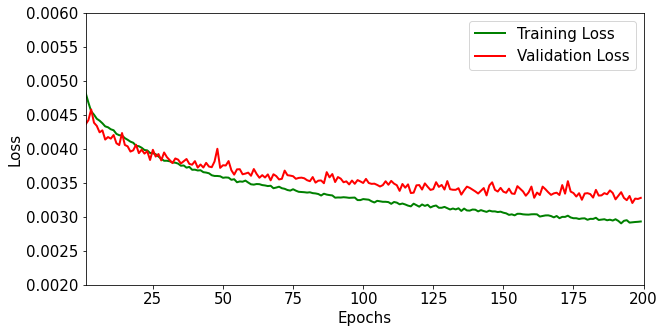

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(train_loss_list,c='g',label="Training Loss",linewidth=2)
plt.plot(valid_loss_list,c='r',label="Validation Loss",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(1,200)
plt.ylim(0.0020,0.0060)
plt.legend()
plt.show()

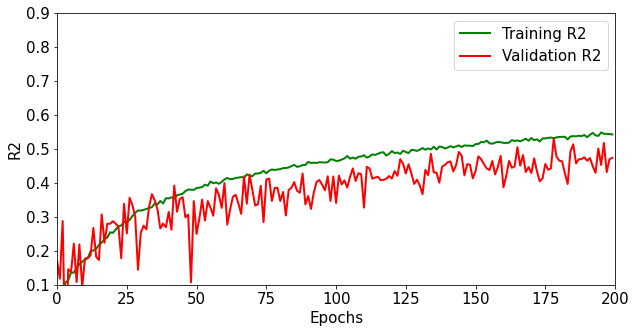

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(train_acc_l[0:],c='g',label="Training R2",linewidth=2)
plt.plot(val_acc_l[0:],c='r',label="Validation R2",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.xlim(0,200)
plt.ylim(0.1,0.9)
plt.legend()
plt.show()

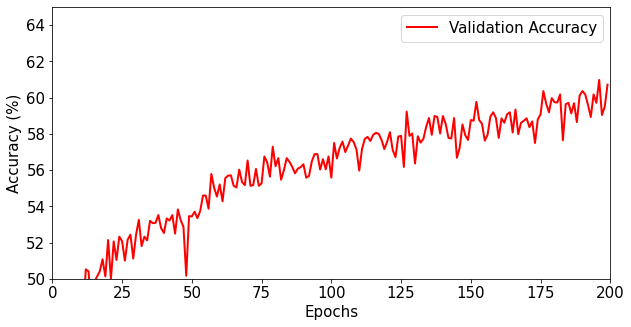

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(validation_acc_l[0:],c='r',label="Validation Accuracy",linewidth=2)
#plt.plot(val_acc_l[5:],c='r',label="Validation R2",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xlim(0,200)
plt.ylim(50,65)
plt.legend()
plt.show()

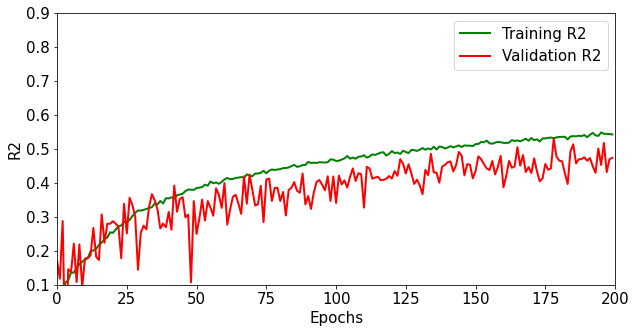

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(train_acc_l[0:],c='g',label="Training R2",linewidth=2)
plt.plot(val_acc_l[0:],c='r',label="Validation R2",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.xlim(0,200)
plt.ylim(0.1,0.9)
plt.legend()
plt.show()